<a href="https://colab.research.google.com/github/its-Harpreet/Machine-Learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf



In [3]:
(train_imgs, train_labels), (test_imgs, test_labels)= tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
def get_labels(idx):
  labels= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return labels[idx]


In [6]:
import matplotlib.pyplot as plt


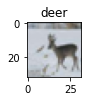

In [7]:
img= train_imgs[20]
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.title(get_labels(train_labels[20][0]))
plt.show()

In [8]:
model= tf.keras.Sequential()

In [9]:
model.add(
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape= (32,32,3), activation='relu')
)

In [10]:
model.add(tf.keras.layers.MaxPool2D())

In [11]:
model.add(
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),  activation='relu')
)

In [12]:
model.add(tf.keras.layers.MaxPool2D())

In [13]:
model.add(tf.keras.layers.Flatten())

In [14]:
model.add(tf.keras.layers.Dense(units=28, activation= 'relu'))

In [15]:
model.add(tf.keras.layers.Dense(units=10, activation= 'softmax'))

In [16]:
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 28)                1

In [18]:
history= model.fit(train_imgs, train_labels, validation_data= [test_imgs,test_labels ], epochs=25)

Epoch 1/25
1563/1563 [==============================] - 49s 31ms/step - loss: 2.1695 - accuracy: 0.2615 - val_loss: 1.9228 - val_accuracy: 0.3325
Epoch 2/25
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5857 - accuracy: 0.4158 - val_loss: 1.5301 - val_accuracy: 0.4494
Epoch 3/25
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4037 - accuracy: 0.4962 - val_loss: 1.3310 - val_accuracy: 0.5216
Epoch 4/25
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2837 - accuracy: 0.5418 - val_loss: 1.3084 - val_accuracy: 0.5422
Epoch 5/25
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2099 - accuracy: 0.5736 - val_loss: 1.2439 - val_accuracy: 0.5683
Epoch 6/25
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1527 - accuracy: 0.5958 - val_loss: 1.2264 - val_accuracy: 0.5777
Epoch 7/25
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1083 - accuracy: 0.6131 - val_loss: 1.1446 -

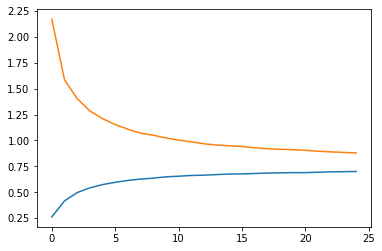

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [22]:
model.save("cifar10.hs")

INFO:tensorflow:Assets written to: cifar10.hs/assets


In [23]:
loaded_model= tf.keras.models.load_model('cifar10.hs')

In [24]:
model.input.shape

TensorShape([None, 32, 32, 3])

**PREDICTION**

In [25]:
from PIL import Image
import requests
import numpy as np
import io


In [32]:
img= tf.keras.preprocessing.image.load_img("/content/cock.png")
img_arr= tf.keras.preprocessing.image.img_to_array(img)
img_arr.resize((32,32,3))
img_arr= np.expand_dims(img_arr,axis=0)
print(img_arr.shape)
output= loaded_model.predict(img_arr)
get_labels(output.argmax())


(1, 32, 32, 3)


'deer'

In [ ]:
for i in range(200):
  olabel= get_labels(test_labels[i][0])
  plabel= get_labels(loaded_model.predict(np.array([test_imgs[i]])).argmax())
  print("❌") if olabel!= plabel else print('✔')
  print("Original:  ", olabel)
  print("Prediction:  ", plabel)
  print('\n')